<a href="https://colab.research.google.com/github/JasonPrat/Fake-News-Detection-Using-Support-Vector-Machine/blob/main/Fake_News_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Fake News Detection

In [1]:
import pandas as pd
import numpy as np

from sklearn.metrics import accuracy_score, mean_squared_error, mean_absolute_error
from sklearn import svm, metrics
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, HashingVectorizer

In [2]:
!wget https://raw.githubusercontent.com/JasonPrat/Fake-News-Detection-Using-Support-Vector-Machine/main/train.csv

--2022-05-29 02:01:24--  https://raw.githubusercontent.com/JasonPrat/Fake-News-Detection-Using-Support-Vector-Machine/main/train.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 98628550 (94M) [text/plain]
Saving to: ‘train.csv’

train.csv           100%[===================>]  94.06M   162MB/s    in 0.6s    

2022-05-29 02:01:26 (162 MB/s) - ‘train.csv’ saved [98628550/98628550]



Create Dataframe

In [3]:
df = pd.read_csv ('train.csv')

In [4]:
df = df.dropna()
msg=df.copy()
msg.reset_index (inplace=True)

Load Dataframe

In [5]:
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


Search Stopwords

In [6]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [7]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re
ps = PorterStemmer()
corpus = []
for i in range(0, len(msg)):
    review = re.sub('[^a-zA-Z]', ' ', msg['text'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

In [8]:
corpus[:10]

['hous dem aid even see comey letter jason chaffetz tweet darrel lucu octob subscrib jason chaffetz stump american fork utah imag courtesi michael jolley avail creativ common licens apolog keith olbermann doubt worst person world week fbi director jame comey accord hous democrat aid look like also know second worst person well turn comey sent infam letter announc fbi look email may relat hillari clinton email server rank democrat relev committe hear comey found via tweet one republican committe chairmen know comey notifi republican chairmen democrat rank member hous intellig judiciari oversight committe agenc review email recent discov order see contain classifi inform long letter went oversight committe chairman jason chaffetz set polit world ablaz tweet fbi dir inform fbi learn exist email appear pertin investig case reopen jason chaffetz jasoninthehous octob cours know case comey actual say review email light unrel case know anthoni weiner sext teenag appar littl thing fact matter c

TF-IDF Vectorizer Approach

In [9]:
vectorizer =TfidfVectorizer(max_features=5000,ngram_range=(1,3))
X = vectorizer.fit_transform(corpus).toarray()
Y= msg.iloc [:,-1]

In [10]:
X_train, X_test,Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=0)

Generate Confusion Matrix

In [11]:
import matplotlib.pyplot as plt
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Classifier With Multinomial Naive Bayes

accuracy:   0.900
MSE : 0.100


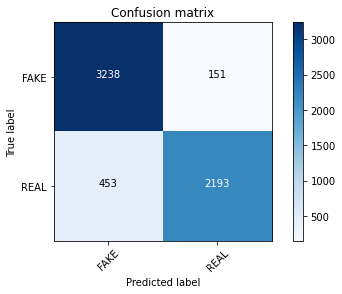

In [12]:
from sklearn.naive_bayes import MultinomialNB
import itertools
classifier=MultinomialNB()

classifier.fit(X_train, Y_train)
pred = classifier.predict(X_test)
score = metrics.accuracy_score(Y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(Y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])
MSE = mean_squared_error(Y_test,pred);
print ("MSE : %0.3f" % MSE)

Classifier with Support Vector Machine

accuracy:   0.961
MSE : 0.039


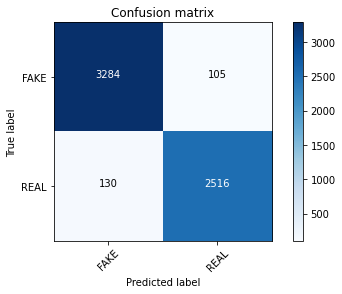

In [13]:
SVM = svm.SVC().fit(X_train,Y_train)
pred = SVM.predict(X_test)
score = metrics.accuracy_score(Y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(Y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])
MSE = mean_squared_error(Y_test,pred);
print ("MSE : %0.3f" % MSE)